In [232]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing 
import matplotlib.pyplot as plt

#prepare data 
# users in columns and movies in rows
data = pd.read_csv('movie_gender.csv')
del data['gender']
#data.replace(to_replace = 3, value = 1, inplace = True)
data.replace(to_replace = 3, value =np.random.randint(3,5), inplace = True)

data.head()



,abovetherim1994,absolutepower1997,abyssthe1989,aceventurapetdetective1994,aceventurawhennaturecalls1995,achefinlove1996,acrosstheseaoftime1995,addamsfamilyvalues1993,addictedtolove1997,addictionthe1995,adventuresofpinocchiothe1996,adventuresofpriscillaqueenofthed,adventuresofrobinhoodthe1938,affairtorememberan1957,africanqueenthe1951,afterglow1997,ageofinnocencethe1993,aiqingwansui1994,airbud1997,airforceone1997,airheads1994,airuptherethe1994,akira1988,aladdin1992,aladdinandthekingofthieves1996,...,wingsofthedovethe1997,winniethepoohandtheblusteryday19,winterguestthe1997,wishmaster1997,withhonors1994,withnailandi1987,witness1985,wizardofozthe1939,wolf1994,womaninquestionthe1950,womenthe1939,wonderfulhorriblelifeofleniriefe,wonderland1997,woodenmansbridethewukui1994,worldofaputheapursansar1959,wrongtrousersthe1993,wyattearp1994,yankeezulu1994,yearofthehorse1997,youngfrankenstein1974,youngguns1988,younggunsii1990,youngpoisonershandbookthe1995,yousocrazy1994,zeusandroxanne1997
0,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1,3,3,3,4,4,3,...,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,5,3,3,3,5,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,...,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,1,3,3,2,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,4,4,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,4,3,3,3,3,3


In [233]:
#shuffle dataste!!
data = data.sample(frac=1).reset_index(drop=True)

In [234]:
#data.describe()
np.round(data.describe(), decimals=2)



,abovetherim1994,absolutepower1997,abyssthe1989,aceventurapetdetective1994,aceventurawhennaturecalls1995,achefinlove1996,acrosstheseaoftime1995,addamsfamilyvalues1993,addictedtolove1997,addictionthe1995,adventuresofpinocchiothe1996,adventuresofpriscillaqueenofthed,adventuresofrobinhoodthe1938,affairtorememberan1957,africanqueenthe1951,afterglow1997,ageofinnocencethe1993,aiqingwansui1994,airbud1997,airforceone1997,airheads1994,airuptherethe1994,akira1988,aladdin1992,aladdinandthekingofthieves1996,...,wingsofthedovethe1997,winniethepoohandtheblusteryday19,winterguestthe1997,wishmaster1997,withhonors1994,withnailandi1987,witness1985,wizardofozthe1939,wolf1994,womaninquestionthe1950,womenthe1939,wonderfulhorriblelifeofleniriefe,wonderland1997,woodenmansbridethewukui1994,worldofaputheapursansar1959,wrongtrousersthe1993,wyattearp1994,yankeezulu1994,yearofthehorse1997,youngfrankenstein1974,youngguns1988,younggunsii1990,youngpoisonershandbookthe1995,yousocrazy1994,zeusandroxanne1997
count,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,...,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.00,943.0,943.00
mean,3.00,3.05,3.09,3.01,2.99,3.01,3.00,2.98,3.01,2.99,3.00,3.07,3.06,3.03,3.19,3.00,3.03,3.00,2.98,3.29,2.98,3.00,3.02,3.19,3.00,...,3.05,3.06,3.00,2.98,3.00,3.00,3.00,3.28,2.98,3.00,3.01,3.01,3.00,3.00,3.01,3.18,3.01,3.00,3.00,3.20,3.02,2.99,3.01,3.0,2.99
std,0.05,0.37,0.42,0.40,0.23,0.13,0.07,0.29,0.24,0.16,0.23,0.40,0.30,0.24,0.53,0.14,0.28,0.07,0.30,0.74,0.21,0.09,0.27,0.56,0.17,...,0.31,0.37,0.14,0.25,0.25,0.15,0.03,0.68,0.26,0.07,0.17,0.12,0.15,0.07,0.15,0.57,0.22,0.07,0.15,0.57,0.30,0.22,0.26,0.0,0.10
min,2.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,2.00,2.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,1.00,1.00,1.00,3.0,1.00
25%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00
50%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00
75%,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,4.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.00,3.0,3.00
max,4.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,4.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,5.00,3.00,5.00,5.00,5.00,4.00,5.00,5.00,5.00,3.00,5.00,5.00,5.00,5.00,5.00,3.0,3.00


In [235]:
# center and scale the data 
scaled_data = preprocessing.scale(data)
norm_data = pd.DataFrame(scaled_data)


In [236]:
#scaled_data.tail() 
train_data = norm_data.iloc[0:755,:]
test_data = norm_data.iloc[755:,:]


pca =  PCA(n_components=2).fit(train_data)
P = pca.transform(train_data)

In [237]:
train_data.shape

(755, 1658)

In [238]:
#data.shape
data.tail()

,abovetherim1994,absolutepower1997,abyssthe1989,aceventurapetdetective1994,aceventurawhennaturecalls1995,achefinlove1996,acrosstheseaoftime1995,addamsfamilyvalues1993,addictedtolove1997,addictionthe1995,adventuresofpinocchiothe1996,adventuresofpriscillaqueenofthed,adventuresofrobinhoodthe1938,affairtorememberan1957,africanqueenthe1951,afterglow1997,ageofinnocencethe1993,aiqingwansui1994,airbud1997,airforceone1997,airheads1994,airuptherethe1994,akira1988,aladdin1992,aladdinandthekingofthieves1996,...,wingsofthedovethe1997,winniethepoohandtheblusteryday19,winterguestthe1997,wishmaster1997,withhonors1994,withnailandi1987,witness1985,wizardofozthe1939,wolf1994,womaninquestionthe1950,womenthe1939,wonderfulhorriblelifeofleniriefe,wonderland1997,woodenmansbridethewukui1994,worldofaputheapursansar1959,wrongtrousersthe1993,wyattearp1994,yankeezulu1994,yearofthehorse1997,youngfrankenstein1974,youngguns1988,younggunsii1990,youngpoisonershandbookthe1995,yousocrazy1994,zeusandroxanne1997
938,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,5,4,3,3,5,3,3,3,3,3
939,3,3,3,3,2,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,5,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3
940,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
941,3,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
942,3,3,4,3,3,3,3,4,3,3,3,3,3,4,3,3,5,3,3,4,2,4,3,3,3,...,4,4,3,3,3,3,3,5,3,3,5,3,3,3,3,5,4,3,3,5,4,3,3,3,3


In [239]:
pca =  PCA(n_components=2).fit(train_data)
P = pca.transform(train_data)

In [240]:
P.shape

(755, 2)

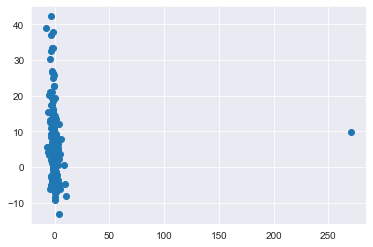

In [241]:
plt.scatter(P[:,0],P[:,1])

In [242]:
Ptest = pca.transform(test_data)
Ptest.shape

(188, 2)

In [243]:
from sklearn.neighbors import NearestNeighbors
K = NearestNeighbors(n_neighbors=3)
nn = K.fit(P)

In [244]:
D, N = nn.kneighbors(Ptest)

In [245]:
#D

In [246]:
#N

In [247]:
np.sqrt(np.sum(np.square(test_data.iloc[0,:]-train_data.iloc[48,:])))

68.46834712732729

In [248]:
train_data.iloc[0,:]

0       0.000000
1      -0.134935
2      -0.223206
3      -0.013251
4       0.056493
          ...   
1653   -0.075275
1654    0.048069
1655   -0.056206
1656    0.000000
1657    0.054354
Name: 0, Length: 1658, dtype: float64

In [249]:
test_data.iloc[0,:]

0       0.000000
1      -0.134935
2       2.141771
3      -0.013251
4       0.056493
          ...   
1653   -0.075275
1654    0.048069
1655   -0.056206
1656    0.000000
1657    0.054354
Name: 755, Length: 1658, dtype: float64

In [250]:
np.sqrt(np.sum(np.square(Ptest[0,:]-P[48,:])))

6.361569873927013

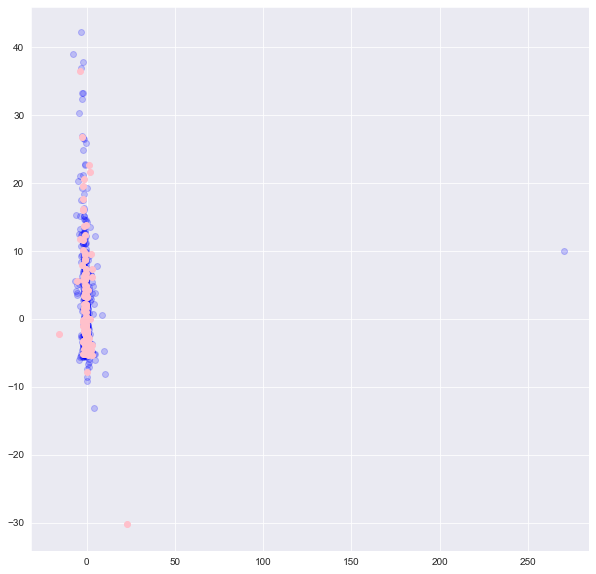

In [251]:
plt.figure(figsize=(10,10))
plt.scatter(P[:,0],P[:,1],color='blue',alpha=0.2)
plt.scatter(Ptest[:,0],Ptest[:,1],color='pink')


In [252]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=3)
#nn = knn.fit(P)
#pred = nn.predict(Ptest)

nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(P)
distances, indices = nbrs.kneighbors(Ptest)
#indices
#Ptest[0,:], P[70,:], P[24,:]

In [253]:
nbrs.kneighbors_graph(Ptest).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [275]:
from sklearn.neighbors import KDTree
kdt = KDTree(P, leaf_size=30, metric='euclidean')
#kdt.query(Ptest, k=3, return_distance=False)

In [255]:
nbrs_auto = NearestNeighbors(n_neighbors=5, algorithm='auto').fit(P)
distances, indices = nbrs_auto.kneighbors(Ptest)

indices


array([[722, 111, 440, 244, 181],
       [607, 404,  80, 671, 547],
       [619, 149, 230, 520,   2],
       [723, 744, 141, 680, 486],
       [472, 305, 114, 211, 754],
       [744, 141, 486, 723, 348],
       [144, 535, 387, 599, 406],
       [ 46, 458, 670, 639, 281],
       [738, 556, 439, 610, 629],
       [279, 329,  12, 123, 532],
       [617, 694,   3, 639, 640],
       [117,  98, 321,  60, 542],
       [205, 195,  72, 215,  30],
       [  1, 708, 716,  23, 354],
       [431, 162, 336, 523, 748],
       [331,  92, 593, 324, 231],
       [628, 155, 729, 488, 287],
       [650, 724, 750, 249, 247],
       [659, 247, 306, 348, 442],
       [328, 214, 290, 426, 288],
       [155, 630, 740, 287, 653],
       [548, 537, 651, 369, 314],
       [155, 628, 630, 411, 318],
       [136, 197, 697, 264, 163],
       [299, 645, 652, 424, 140],
       [ 30, 195, 215, 205, 587],
       [148, 351, 508, 543, 187],
       [719, 707, 656, 237, 240],
       [607, 404, 547,  80, 303],
       [137, 3

In [256]:
#270, 679, 549, 696, 466
data.iloc[[492, 142, 747, 634,  48]]


,abovetherim1994,absolutepower1997,abyssthe1989,aceventurapetdetective1994,aceventurawhennaturecalls1995,achefinlove1996,acrosstheseaoftime1995,addamsfamilyvalues1993,addictedtolove1997,addictionthe1995,adventuresofpinocchiothe1996,adventuresofpriscillaqueenofthed,adventuresofrobinhoodthe1938,affairtorememberan1957,africanqueenthe1951,afterglow1997,ageofinnocencethe1993,aiqingwansui1994,airbud1997,airforceone1997,airheads1994,airuptherethe1994,akira1988,aladdin1992,aladdinandthekingofthieves1996,...,wingsofthedovethe1997,winniethepoohandtheblusteryday19,winterguestthe1997,wishmaster1997,withhonors1994,withnailandi1987,witness1985,wizardofozthe1939,wolf1994,womaninquestionthe1950,womenthe1939,wonderfulhorriblelifeofleniriefe,wonderland1997,woodenmansbridethewukui1994,worldofaputheapursansar1959,wrongtrousersthe1993,wyattearp1994,yankeezulu1994,yearofthehorse1997,youngfrankenstein1974,youngguns1988,younggunsii1990,youngpoisonershandbookthe1995,yousocrazy1994,zeusandroxanne1997
492,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
142,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,2,3,3,3,3,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,2,3,3,3,3,4,3,3,3,3
747,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3
634,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,4,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
48,3,4,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,5,3,3,3,3,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [28]:
#data.iloc[460,:].head(20)

In [29]:
#data.iloc[189,:].head(10)

In [30]:
#data.iloc[242,:]

In [31]:
#data.iloc[402,:].head(20)

In [32]:
#data.iloc[222,:].head(20)

In [257]:
pd.set_option('display.max_row', 1000)
pd.set_option('display.max_columns', 50)

In [259]:
data.iloc[[492, 142, 747, 634,  48]]

,abovetherim1994,absolutepower1997,abyssthe1989,aceventurapetdetective1994,aceventurawhennaturecalls1995,achefinlove1996,acrosstheseaoftime1995,addamsfamilyvalues1993,addictedtolove1997,addictionthe1995,adventuresofpinocchiothe1996,adventuresofpriscillaqueenofthed,adventuresofrobinhoodthe1938,affairtorememberan1957,africanqueenthe1951,afterglow1997,ageofinnocencethe1993,aiqingwansui1994,airbud1997,airforceone1997,airheads1994,airuptherethe1994,akira1988,aladdin1992,aladdinandthekingofthieves1996,...,wingsofthedovethe1997,winniethepoohandtheblusteryday19,winterguestthe1997,wishmaster1997,withhonors1994,withnailandi1987,witness1985,wizardofozthe1939,wolf1994,womaninquestionthe1950,womenthe1939,wonderfulhorriblelifeofleniriefe,wonderland1997,woodenmansbridethewukui1994,worldofaputheapursansar1959,wrongtrousersthe1993,wyattearp1994,yankeezulu1994,yearofthehorse1997,youngfrankenstein1974,youngguns1988,younggunsii1990,youngpoisonershandbookthe1995,yousocrazy1994,zeusandroxanne1997
492,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
142,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,3,2,3,3,3,3,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,2,3,3,3,3,4,3,3,3,3
747,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,5,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,3
634,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,3,3,3,4,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
48,3,4,3,3,3,3,3,3,3,3,3,3,3,3,5,3,3,3,3,5,3,3,3,3,3,...,3,3,3,3,3,3,3,5,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [184]:
#data.loc[data['withnailandi1987'] == 5]

In [260]:
average_movie=data.mean(axis=0)
average_user=data.mean(axis=1)


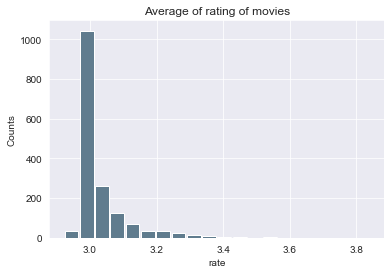

In [261]:
average_movie.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Average of rating of movies')
plt.ylabel('Counts')
plt.xlabel('rate')
plt.grid(axis='y', alpha=0.9)

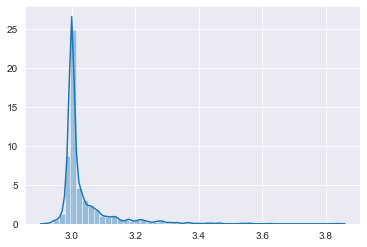

In [262]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(average_movie)


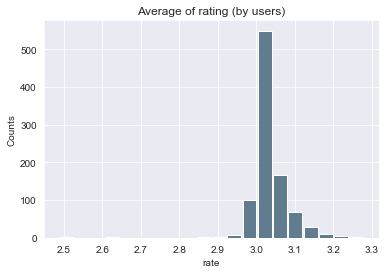

In [263]:
average_user.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Average of rating (by users)')
plt.ylabel('Counts')
plt.xlabel('rate')
plt.grid(axis='y', alpha=0.9)
        

In [264]:
df = pd.DataFrame(data=average_movie, columns=['mean'])

In [265]:
df.shape

(1658, 1)

In [266]:
df.head()

,mean
abovetherim1994,3.000000
absolutepower1997,3.049841
abyssthe1989,3.094380
aceventurapetdetective1994,3.005302
aceventurawhennaturecalls1995,2.987275


In [267]:
df2 = df[df['mean'] > 3.4]

In [268]:
df2.shape

(14, 1)

In [269]:
df2.head(14)

,mean
contact1997,3.433722
empirestrikesbackthe1980,3.468717
fargo1996,3.622481
godfatherthe1972,3.562036
princessbridethe1987,3.402969
pulpfiction1994,3.443266
raidersofthelostark1981,3.557794
returnofthejedi1983,3.541888
schindlerslist1993,3.463415
shawshankredemptionthe1994,3.433722


In [270]:
#data[['backtothefuture1985', 'boogienights1997']] 

In [271]:
indexNamesArr = df2.index.values
listOfRowIndexLabels = list(indexNamesArr)

In [272]:
df2.index.values[1:14]

array(['empirestrikesbackthe1980', 'fargo1996', 'godfatherthe1972',
       'princessbridethe1987', 'pulpfiction1994',
       'raidersofthelostark1981', 'returnofthejedi1983',
       'schindlerslist1993', 'shawshankredemptionthe1994',
       'silenceofthelambsthe1991', 'starwars1977', 'titanic1997',
       'toystory1995'], dtype=object)

In [273]:
data_to_show = pd.DataFrame(data=data, columns=['empirestrikesbackthe1980', 'fargo1996', 'godfatherthe1972',
       'princessbridethe1987', 'pulpfiction1994',
       'raidersofthelostark1981', 'returnofthejedi1983',
       'schindlerslist1993', 'shawshankredemptionthe1994',
       'silenceofthelambsthe1991', 'starwars1977', 'titanic1997',
       'toystory1995'])

In [274]:
data_to_show.iloc[[492, 142, 747, 634,  48]]

,empirestrikesbackthe1980,fargo1996,godfatherthe1972,princessbridethe1987,pulpfiction1994,raidersofthelostark1981,returnofthejedi1983,schindlerslist1993,shawshankredemptionthe1994,silenceofthelambsthe1991,starwars1977,titanic1997,toystory1995
492,3,5,3,5,4,3,3,3,3,5,5,3,3
142,4,4,4,4,2,4,4,5,2,4,3,4,4
747,5,4,4,4,3,4,4,5,3,5,4,3,4
634,5,3,3,5,5,5,5,5,3,4,5,5,5
48,3,5,3,3,3,2,3,5,5,5,3,3,3
